## IBM Attrition
Uncover the factors that lead to employee attrition and explore important questions.


In [1]:
#first question
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Key columns we are focused on are
* DistancefromHome - Numerical
* Education - Categorical
* Monthlyincome - Numerical
* Jobrole - Categorical
* Attrition - Categorical


Since our analysis is bivariate/multivariate based on the questions, an approach will be:
```
df.groupby(["Categorical columns"])[numerical columns].agg().reset_index() 
```

### 1. DistancefromHome and jobroles and attrition

In [8]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [21]:
data.groupby(["JobRole", "Attrition"])["DistanceFromHome"].mean().unstack().reset_index().sort_values("Yes",ascending=False)


Attrition,JobRole,No,Yes
0,Healthcare Representative,9.204918,17.666667
1,Human Resources,6.600000,13.416667
7,Sales Executive,9.026022,12.649123
3,Manager,7.927835,10.000000
6,Research Scientist,8.869388,9.765957
2,Laboratory Technician,9.329949,9.661290
4,Manufacturing Director,9.533333,8.800000
8,Sales Representative,9.000000,8.151515
5,Research Director,8.474359,7.000000


In [35]:
# Save the results into a table we will reuse during the visualization phase
data1 = data.groupby(["JobRole", "Attrition"])["DistanceFromHome"].mean().reset_index()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare Representative'),
  Text(1, 0, 'Human Resources'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manager'),
  Text(4, 0, 'Manufacturing Director'),
  Text(5, 0, 'Research Director'),
  Text(6, 0, 'Research Scientist'),
  Text(7, 0, 'Sales Executive'),
  Text(8, 0, 'Sales Representative')])

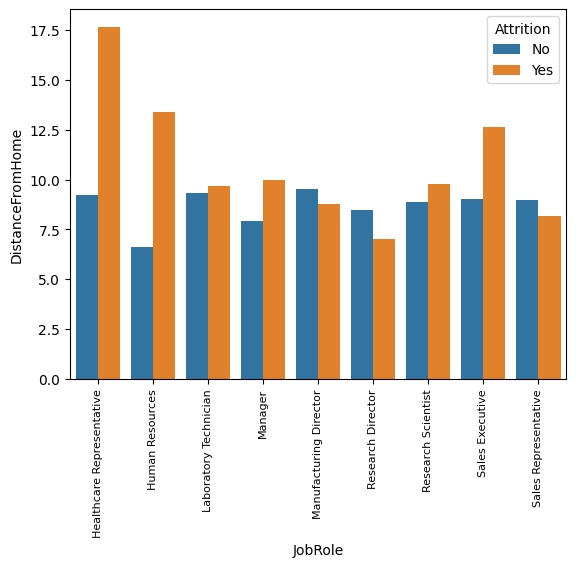

In [37]:
sns.barplot(data=data1, x="JobRole", y="DistanceFromHome", hue='Attrition')
plt.xticks(rotation='vertical', size=8)

###  2. Compare average monthly income by education and attrition.


In [23]:
data.groupby(["Education", "Attrition"])["MonthlyIncome"].mean().unstack().reset_index().sort_values("No",ascending=False)

Attrition,Education,No,Yes
4,5,8559.906977,5850.200000
3,4,7087.814706,5335.155172
2,3,6882.919662,4770.242424
1,2,6586.058824,4282.545455
0,1,5926.129496,4360.161290


In [34]:
data.groupby([ "Attrition", "Education"])["MonthlyIncome"].mean().unstack().reset_index()

Education,Attrition,1,2,3,4,5
0,No,5926.129496,6586.058824,6882.919662,7087.814706,8559.906977
1,Yes,4360.161290,4282.545455,4770.242424,5335.155172,5850.200000


In [39]:
data2 = data.groupby([ "Attrition", "Education"])["MonthlyIncome"].mean().reset_index()

<Axes: xlabel='Education', ylabel='MonthlyIncome'>

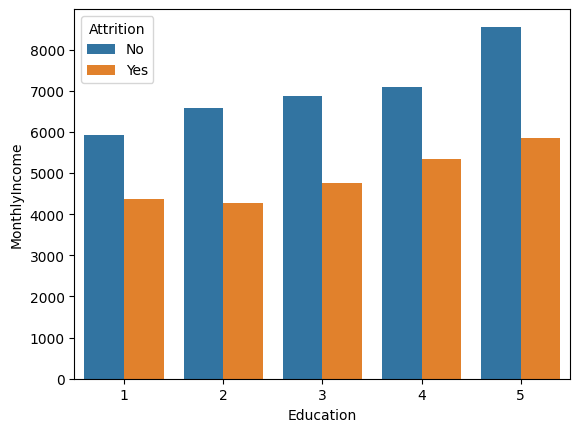

In [40]:
#seaborn barplots

sns.barplot(data=data2, x="Education", y="MonthlyIncome", hue='Attrition')